In [2]:
# For this exercise you are going to work again with a movie review dataset. 
# In this dataset,  the ratings, budgets, and other information on popular 
# movies released in 2014 and 2015  were collected from social media websites 
# such as YouTube, Twitter, IMDB, etc. The  aggregated dataset can be downloaded 
# from OA 4.13. 
#
# Use this dataset to answer the following questions:  
#     1. What can you tell about the rating of a movie from its budget and aggregated number of  
#        followers in social media channels?  
#     2. If you incorporate the type of interaction the movie has received (number of likes, 
#        dislikes, and comments) in social media channels, does it improve your prediction?
#     3. Among all the factors you considered in the last two models, which one is the best predictor 
#        of movie rating? With the best predictor feature, use gradient descent to find the  optimal 
#        intercept and gradient for the dataset. 

In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer

# Load and print dataset to ensure data is clean, numeric, and I know what columns are available
df = pd.read_excel('../Datasets/Code_and_Data_(Chapter_04)/Code and Data (Chapter 04)/csm.xlsx')
# print(df)

# Define the gradient descent function
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros((n,1))
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        prediction = np.dot(X, theta)
        error = prediction - y
        theta = theta - (1/m) * learning_rate * X.T.dot(error)
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Define the cost computation function
def compute_cost(X, y, theta):
    m = len(y)
    prediction = np.dot(X, theta)
    cost = (1/(2*m)) * np.sum(np.square(prediction - y))
    return cost

# Define a prediction function
def predict(X, theta):
    return np.dot(X, theta)



Coefficients from the Gradient Descent Model on the Effect of Budget and Followers on Ratings
Coefficient for Budget: [1.51635395]
Coefficient for Followers: [-2.63760351] 




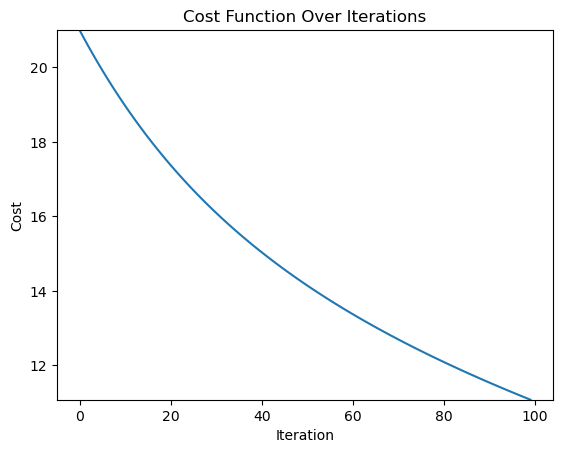

In [4]:
##############################################################################################
#                                                                                            #
#                                          PART I                                            #
#                                                                                            #
# 2. If you incorporate the type of interaction the movie has received (number of likes,     #
#    dislikes, and comments) in social media channels, does it improve your prediction?      #
#                                                                                            #
##############################################################################################

# Isolate the feature set and dependent variable
X = df[['Budget', 'Aggregate Followers']]
y = np.reshape(df['Ratings'], (-1, 1))

# Remediating the NaN values observed in the 'Aggregate Followers' column by imputing missing values 
# with the mean of the column values. This is the most reasonable approach I have determined when 
# restricted by the model type as gradient descent.
imputer = SimpleImputer(strategy='mean') 
X = imputer.fit_transform(X)

# Normalize X, preventing overflow which was occuring
X = (X - np.mean(X)) / np.std(X)

# Train the model using gradient descent
theta, cost_history = gradient_descent(X, y, learning_rate=0.01, iterations=100)

# Print the coefficient variables for analysis
print("\n\nCoefficients from the Gradient Descent Model on the Effect of Budget and Followers on Ratings")
print("Coefficient for Budget:", theta[0])
print(f"Coefficient for Followers: {theta[1]} \n\n")

# Plot the cost history
plt.ylim(min(cost_history), max(cost_history))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Based on the results of the gradient descent model, we can conclude:
#   - Budget has a positive correlation with ratings, so a higher budget is correlated with higher ratings,
#     and vice versa.
#   - Followers has a negative correlation with ratings, implying an inverse relationship. Thus, a higher follower 
#     count is correlated with lower ratings, and vice versa.
#   - Since the absolute value of the correlation value of followers is higher than that of budget, a unit change in 
#     followers has a greater impact on the predicted rating in this model than budget



Coefficients from the Gradient Descent Model on Target Variable Ratings
Coefficient for Budget: [1.47975735]
Coefficient for Aggregate Followers: [-0.96049541]
Coefficient for Likes: [-1.33001364]
Coefficient for Dislikes: [-1.33165265]
Coefficient for Comments: [-1.33150838] 




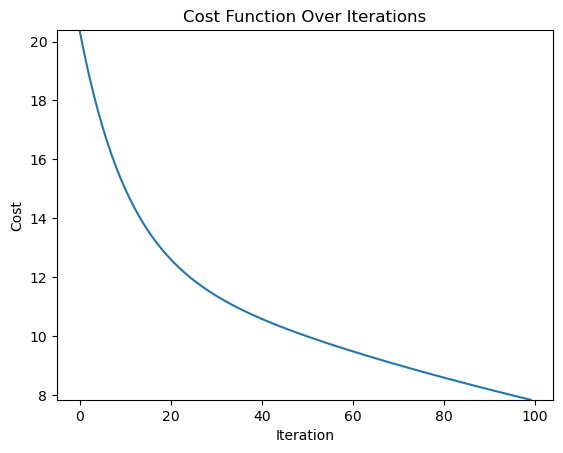

In [5]:
##############################################################################################
#                                                                                            #
#                                          PART II                                           #
#                                                                                            #
# 2. If you incorporate the type of interaction the movie has received (number of likes,     #
#    dislikes, and comments) in social media channels, does it improve your prediction?      #
#                                                                                            #
##############################################################################################


# Isolate the feature set and dependent variable
X = df[['Budget', 'Aggregate Followers', 'Likes', 'Dislikes', 'Comments']]
y = np.reshape(df['Ratings'], (-1, 1))

# Remediating the NaN values observed in the 'Aggregate Followers' column by imputing missing values 
# with the mean of the column values. This is the most reasonable approach I have determined when 
# restricted by the model type as gradient descent.
X = imputer.fit_transform(X)

# Normalize X, preventing overflow which was occuring
X = (X - np.mean(X)) / np.std(X)

# Train the model using gradient descent
theta, cost_history = gradient_descent(X, y, learning_rate=0.01, iterations=100)

# Print the coefficient variables for analysis
print("\n\nCoefficients from the Gradient Descent Model on Target Variable Ratings")
print("Coefficient for Budget:", theta[0])
print("Coefficient for Aggregate Followers:", theta[1])
print("Coefficient for Likes:", theta[2])
print("Coefficient for Dislikes:", theta[3])
print(f"Coefficient for Comments: {theta[4]} \n\n")

# Plot the cost history
plt.ylim(min(cost_history), max(cost_history))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

# Based on the results of the gradient descent model, we can conclude:
#   - Budget has a positive correlation with ratings, so a higher budget is correlated with higher ratings,
#     and vice versa.
#   - Followers, likes, dislikes, comments has a negative correlation with ratings, implying an inverse relationship. 
#     Thus, a higher value for these variables is correlated with lower ratings, and vice versa.



Coefficients from the Gradient Descent Model on the Effect of Budget and Followers on Ratings
Optimal Gradient for Budget: [0.18011293]
Optimal Intercept for Budget: [[0.]]


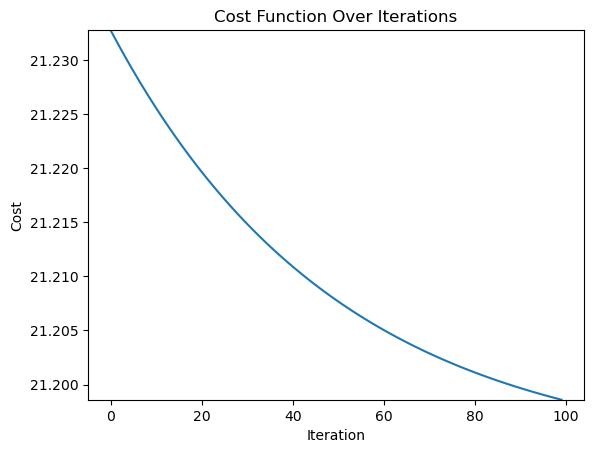

In [8]:
##############################################################################################
#                                                                                            #
#                                         PART III                                           #   
#                                                                                            #
# 3. Among all the factors you considered in the last two models, which one is the best      #
#    predictor of movie rating? With the best predictor feature, use gradient descent        #
#    to find the  optimal intercept and gradient for the dataset.                            #
#                                                                                            #
##############################################################################################

# Based on the limited information gathered in the last two gradient descent models, 
# budget appeats to be  the best indicator because the absolute value of budget coefficient is 
# higher than the absolute value of the other predictors in both models. However, I am skeptical
# of this assertion, as gradient descent is a limited model, and no other investigation was
# done regarding scaling of predictors, normalization, or collinearity. Therefore, further 
# investigation is needed to definitively make this assertion.

# Isolate the feature set and dependent variable
X = np.reshape(df['Budget'], (-1, 1))
y = np.reshape(df['Ratings'], (-1, 1))

# Remediating the NaN values observed in the 'Aggregate Followers' column by imputing missing values 
# with the mean of the column values. This is the most reasonable approach I have determined when 
# restricted by the model type as gradient descent.
X = imputer.fit_transform(X)

# Normalize X, preventing overflow which was occuring
X = (X - np.mean(X)) / np.std(X)

# Train the model using gradient descent
theta, cost_history = gradient_descent(X, y, learning_rate=0.01, iterations=100)

# Print the coefficient variables for analysis
print("\n\nCoefficients from the Gradient Descent Model on the Effect of Budget and Followers on Ratings")
print("Optimal Gradient for Budget:", theta[0])
print("Optimal Intercept for Budget:", predict(np.array([[0]]), theta))

# Plot the cost history
plt.ylim(min(cost_history), max(cost_history))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()